# Lista 2 - Física Atômica e Molecular A

## Preliminares

### Coordenadas Esferoidais Prolatas

Conforme visto em aulas anteriores, foram introduzidas as coordenadas esferoidais prolatas

\begin{equation}
\begin{cases}
    x = a \sinh(\mu)\sin(\nu)\cos(\varphi)\\
    y = a \sinh(\mu)\sin(\nu)\sin(\varphi)\\
    z = a \cosh(\mu)\cos(\nu)
\end{cases}
\end{equation}


Onde $a \in \mathbb{R}$, $\mu \in [0,\infty)$, $\nu \in [0, \pi]$ e $\varphi \in [0,2\pi]$. Por conveniênica, introduz-se as substituições:

\begin{equation}
\begin{cases}
    \xi = \cosh(\mu)\\
    \eta = \cos(\nu)\\
    R = 2a     
\end{cases}
\end{equation}

No caso, $\xi \in [1,\infty)$ e $\eta \in [-1, 1]$. Neste sistema de coordenadas, um elemento de volume infinitesimal é escrito como:

$$dV = \dfrac{R^3}{8}(\xi^2 - \eta^2) d\xi d\eta d\varphi$$

De aulas anteriores, sabemos que:

$$
    \xi = \dfrac{r_1 + r_2}{R}
$$

$$
    \eta = \dfrac{r_1 - r_2}{R}
$$

## Questão 1

Por definição, com $\psi_i(\mathbf{r}_i) = \pi^{-1/2} e^{-r_i}$

$$
\displaystyle
S_{12} = \int \psi_1(\mathbf{r}_1) \psi_2(\mathbf{r}_2)\,dV = \int \dfrac{e^{-(r_1 + r_2)}}{\pi}\,dV
$$

Usando as coordenadas esferoidais prolatas, temos

\begin{equation}
\begin{split}
\displaystyle
S_{12} & = \dfrac{1}{\pi} \int_0^{2\pi} \int_{-1}^{1} \int_1^\infty e^{-R\xi} \dfrac{R^3}{8}(\xi^2 - \eta^2)\,d\xi d\eta d\phi \\
       & = \dfrac{R^3}{8\pi} \underbrace{\int_0^{2\pi} d\phi}_ {= 2\pi} 
           \left[\underbrace{\int_{-1}^{1} d\eta}_ {=2}  \int_1^\infty \xi^2 e^{-R\xi} d\xi - 
           \underbrace{\int_{-1}^{1} \eta^2  d\eta}_ {=2/3} \int_1^\infty e^{-R\xi}  d\xi \right] \\
\end{split}
\end{equation}

Usando as regras de integração deduzidas anteriormente, temos que

$$ \displaystyle\int_1^\infty \xi^2 e^{-R\xi} \, d\xi =  e^{-R} \left(\dfrac{1}{R} + \dfrac{2}{R^2} + \dfrac{2}{R^3} \right) $$

$$ \displaystyle \int_1^\infty e^{-R\xi} \, d\xi = \dfrac{e^{-R}}{R} $$

\begin{equation}
\begin{split}
\displaystyle
\implies S_{12} & = \dfrac{R^3}{2} \left[2  e^{-R} \left(\dfrac{1}{R} + \dfrac{2}{R^2} + \dfrac{2}{R^3}\right) - 
                    \dfrac{2}{3} \dfrac{e^{-R}}{R} \right] \\
                & = e^{-R} \left[1 + R + \dfrac{R^2}{3} \right]
\end{split}
\end{equation}

## Questão 2

Por definição, com $\psi_i(\mathbf{r}_i) = \pi^{-1/2} e^{-r_i}$,

$$
\displaystyle
\mathcal{E}_{12} = \int \dfrac{\psi_1(\mathbf{r}_1) \psi_2(\mathbf{r}_2)}{r_2}\,dV
                 = \dfrac{1}{\pi} \int \dfrac{e^{-(r_1 + r_2)}}{r_2}\,dV
$$

Usando as coordenadas esferoidais prolatas, temos que $r_2 = \dfrac{R}{2}(\xi - \eta)$. Logo,

\begin{equation}
\begin{split}
\displaystyle
\mathcal{E}_ {12} & = \dfrac{R^3}{8\pi}\dfrac{2}{R} \int_0^{2\pi} \int_{-1}^{1} \int_1^\infty 
                      \dfrac{e^{-R\xi}}{(\xi - \eta)}(\xi - \eta)(\xi + \eta) \,d\xi d\eta d\phi \\
       & = \dfrac{R^2}{4\pi} \underbrace{\int_0^{2\pi} d\phi}_ {= 2\pi} 
           \left[\underbrace{\int_{-1}^{1} d\eta}_ {=2}  \int_1^\infty \xi e^{-R\xi} d\xi - 
           \underbrace{\int_{-1}^{1} \eta  d\eta}_ {=0} \int_1^\infty e^{-R\xi}  d\xi \right] \\
\end{split}
\end{equation}

Usando as regras de integração deduzidas anteriormente, temos que

$$ \displaystyle \int_1^\infty \xi e^{-R\xi} \, d\xi =  e^{-R} \left(\dfrac{1}{R} + \dfrac{1}{R^2} \right) $$

\begin{equation}
\begin{split}
\implies \mathcal{E}_ {12} & = R^2 e^{-R} \left(\dfrac{1}{R} + \dfrac{1}{R^2} \right) \\
                & = e^{-R} (1+R)
\end{split}
\end{equation}

## Questão 3

Por definição, com $\psi_i(\mathbf{r}_i) = \pi^{-1/2} e^{-r_i}$,

$$
\displaystyle
\mathcal{E}_{11} = \int \dfrac{\psi_1(\mathbf{r}_1) \psi_1(\mathbf{r}_1)}{r_1}\,dV
                 = \dfrac{1}{\pi} \int \dfrac{e^{-2r_1}}{r_1}\,dV
$$

Usando as coordenadas esferoidais prolatas, temos que $r_1 = \dfrac{R}{2}(\xi + \eta)$. Logo,

\begin{equation}
\begin{split}
\displaystyle
\mathcal{E}_ {12} & = \dfrac{R^3}{8\pi}\dfrac{2}{R} \int_0^{2\pi} \int_{-1}^{1} \int_1^\infty 
                      \dfrac{e^{-R(\xi+\eta)}}{(\xi + \eta)}(\xi + \eta)(\xi - \eta) \,d\xi d\eta d\phi \\
       & = \dfrac{R^2}{4\pi} 2 \pi\left[\int_{-1}^{1} e^{-R\eta} d\eta \int_1^\infty \xi e^{-R\xi} d\xi - 
           \int_{-1}^{1} \eta e^{-R\eta} d\eta \int_1^\infty e^{-R\xi} d\xi \right] \\
\end{split}
\end{equation}

Usando as regras de integração deduzidas anteriormente, temos que

$$\int_1^\infty \xi e^{-R\xi}\, d\xi =  e^{-R} \left(\dfrac{1}{R} + \dfrac{1}{R^2} \right) $$

$$\int_{-1}^{1} \eta e^{-R\eta}\, d\xi =  (e^{-R} - e^{R})\left(\dfrac{1}{R} + \dfrac{1}{R^2}\right)$$

$$\int_1^\infty e^{-R\xi} \, d\xi = \dfrac{e^{-R}}{R}$$

$$\int_{-1}^{1} e^{-R\eta} \, d\eta = \dfrac{e^{R} - e^{-R}}{R}$$

Com isso, ficamos com

\begin{equation}
\begin{split}
\displaystyle
\implies \mathcal{E}_ {11} & = \dfrac{R^2}{2}
         \left[\left( \dfrac{e^{R} - e^{-R}}{R} \right) e^{-R} \left(\dfrac{1}{R} + \dfrac{1}{R^2} \right) 
         - (e^{-R} - e^{R})\left(\dfrac{1}{R} + \dfrac{1}{R^2}\right) \dfrac{e^{-R}}{R} \right] \\
                & = \dfrac{1-e^{-2R}(1-R)}{R}
\end{split}
\end{equation}

## Questão 4

Substiuindo os resultados encontrados nas questões anteriores nas seguintes equações:

$$
E_1(R) = E_H + \dfrac{1}{R} - \dfrac{\mathcal{E}_{11} - \mathcal{E}_{12}}{1-S_{12}}\\
E_2(R) = E_H + \dfrac{1}{R} - \dfrac{\mathcal{E}_{11} + \mathcal{E}_{12}}{1+S_{12}}
$$

Temos que:

$$ E_1(R) = E_H + \frac{1}{R} \displaystyle - \frac{\left(R + 1\right) e^{- R} + \frac{\left(R + 1\right) e^{- 2 R} - 1}{R}}{\left(\frac{R^{2}}{3} + R + 1\right) e^{- R} - 1} $$

$$ E_2(R) = E_H + \frac{1}{R} \displaystyle - \frac{\left(R + 1\right) e^{- R} - \frac{\left(R + 1\right) e^{- 2 R} - 1}{R}}{\left(\frac{R^{2}}{3} + R + 1\right) e^{- R} + 1} $$

Como os cálculos realizados até agora foram feitos em unidades atômicas, as unidades são:

- $R : \mathrm{Bohr}$
- $E_H, E_1(R)$ e $E_2(R): \mathrm{Ha}$

## Questão 5

Para fazer os cálculos e os gráficos, será utilizada a linguagem Python (versão 3.8.2) com as bibliotecas a seguir:

In [1]:
import numpy as np #Computação numérica
import sympy as sym #Computação simbólica
import matplotlib.pyplot as plt #Plot de gráficos

Em seguida, definem-se algumas funções de conversão de unidades.

In [2]:
#Conversões de unidades
def kcalMol(x): # de Ha a kcal/Mol
    return x/0.0015

def eV(x): # de Ha a eV
    return kcalMol(x)/23.0605

def angs(x): # de Bohr a Å
    return x*0.5292

Em seguida, declara-se a energia exata do estado fundamental do átomo de hidrogênio (em Ha):

In [3]:
#Energia exata do estado fundamental do átomo de H
E_H = -0.5

Realiza-se, então, a declaração das variáveis e expresões simbólicas por meio da biblioteca `sympy`:

In [4]:
R = sym.Symbol('R')

e11 = (1-sym.exp(-2*R)*(1+R))/R
e12 = sym.exp(-1*R)*(1+R)
s12 = sym.exp(-1*R)*(1+R+R*R/3)

expr_E1 = E_H + 1/R - (e11-e12)/(1-s12)
expr_E2 = E_H + 1/R - (e11+e12)/(1+s12)

print(type(e11), type(expr_E1))

<class 'sympy.core.mul.Mul'> <class 'sympy.core.add.Add'>


In [5]:
e11

(-(R + 1)*exp(-2*R) + 1)/R

In [6]:
e12

(R + 1)*exp(-R)

In [7]:
s12

(R**2/3 + R + 1)*exp(-R)

A partir das expressões declaradas acima, pode-se definir as funções que atuarão em arrays do `numpy` para gerar as CEPs por meio do comando `lambdify()`.

In [8]:
E1 = sym.lambdify(R, expr_E1, 'numpy')
E2 = sym.lambdify(R, expr_E2, 'numpy')

In [9]:
print(type(E1), type(E2))

<class 'function'> <class 'function'>


Declara-se, então, os arrays com os valores de R para os quais deseja-se calcular a SEP

In [10]:
vec_R = np.arange(0.5, 10, 0.1)
vec_R

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5,
       9.6, 9.7, 9.8, 9.9])

Para realizar o cálculo dos pontos, basta fazer:

In [11]:
cepE1 = E1(vec_R) - E2(100)
cepE2 = E2(vec_R) - E2(100)

Por fim, realiza-se o plot utilizando o `matplotlib`:

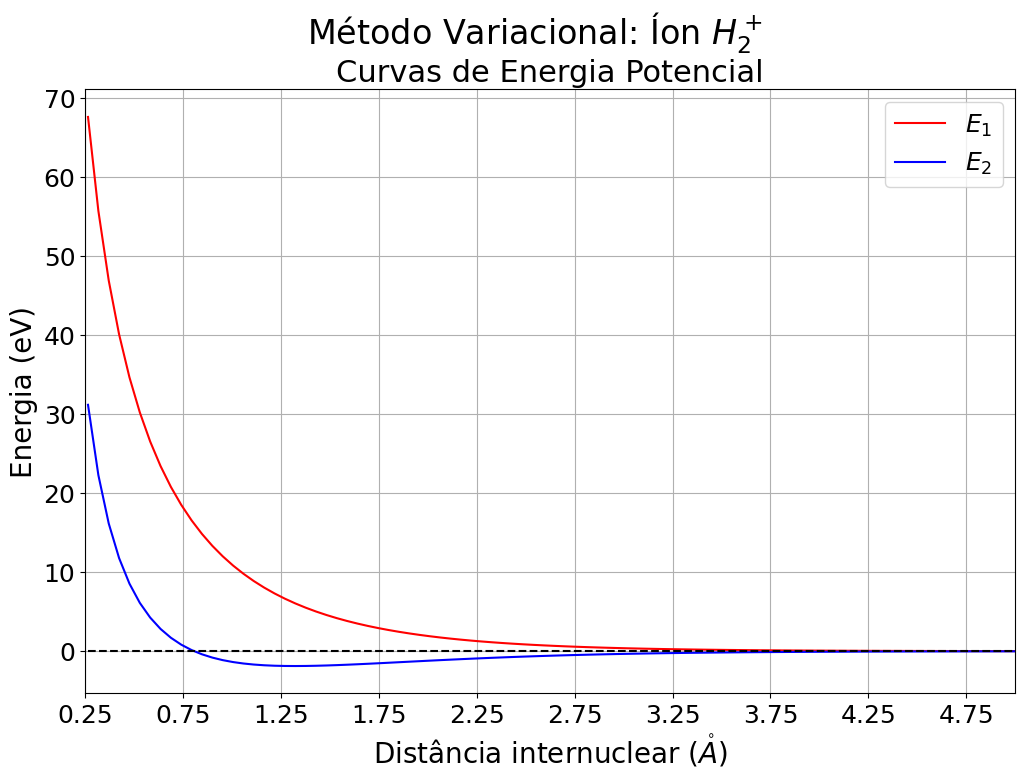

In [12]:
#Cria o fundo, o título e o subtítulo
plt.figure(figsize = (12, 8), dpi = 100)
plt.suptitle('Método Variacional: Íon $H_2^+$', fontsize=24)
plt.title('Curvas de Energia Potencial', fontsize=22)
plt.grid()

#Realiza o plot
plt.plot(angs(vec_R), eV(cepE1), 'r-', label = '$E_1$') #E1 (não-ligado)
plt.plot(angs(vec_R), eV(cepE2), 'b-', label = '$E_2$') #E2 (ligado)
plt.plot(angs(vec_R), np.zeros(len(vec_R)), 'k--') #linha tracejada indicando o zero

#Redefine os limites para os exios
plt.xlim(0.25, 5.)
plt.xticks(np.arange(0.25,5.1, 0.5), fontsize=18)
plt.yticks(fontsize=18)

#Rotula os eixos
plt.xlabel('Distância internuclear ($\\mathring{A}$)', fontsize=20)
plt.ylabel('Energia (eV)', fontsize=20)

#Cria a legenda e exibe o gráfico
plt.legend(fontsize=18)
plt.show()

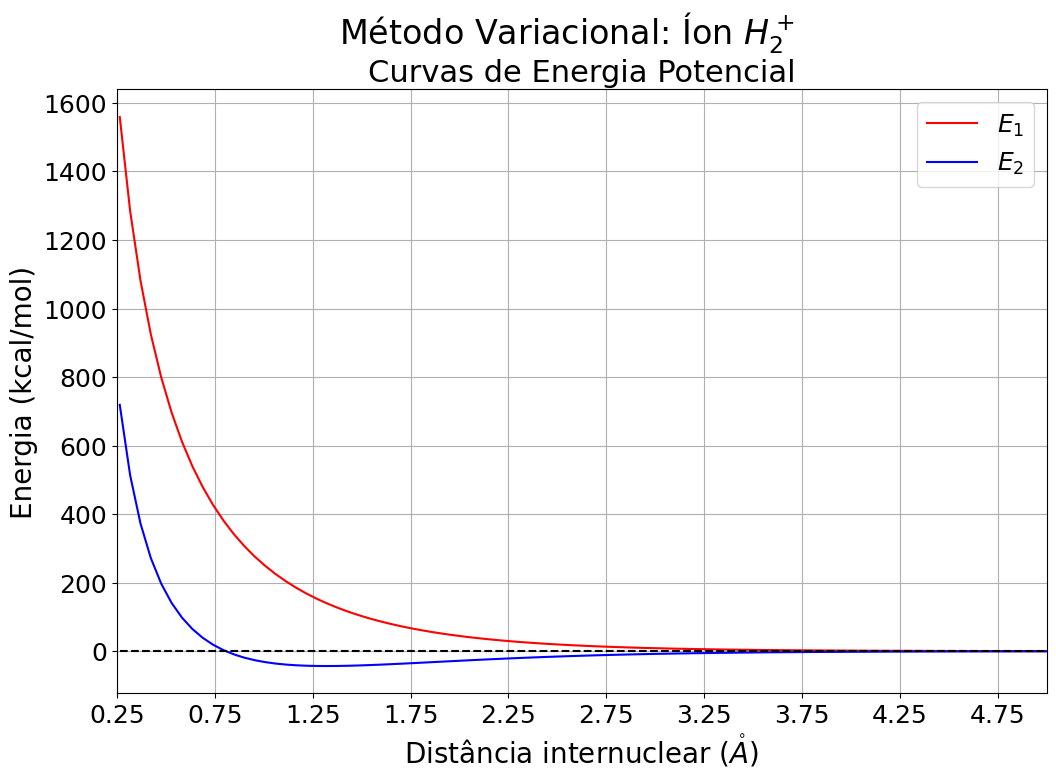

In [13]:
#Cria o fundo, o título e o subtítulo
plt.figure(figsize = (12, 8), dpi = 100)
plt.suptitle('Método Variacional: Íon $H_2^+$', fontsize=24)
plt.title('Curvas de Energia Potencial', fontsize=22)
plt.grid()

#Realiza o plot
plt.plot(angs(vec_R), kcalMol(cepE1), 'r-', label = '$E_1$') #E1 (não-ligado)
plt.plot(angs(vec_R), kcalMol(cepE2), 'b-', label = '$E_2$') #E2 (ligado)
plt.plot(angs(vec_R), np.zeros(len(vec_R)), 'k--') #linha tracejada indicando o zero

#Redefine os limites para os exios
plt.xlim(0.25, 5.)
plt.xticks(np.arange(0.25,5.1, 0.5), fontsize=18)
plt.yticks(fontsize=18)

#Rotula os eixos
plt.xlabel('Distância internuclear ($\\mathring{A}$)', fontsize=20)
plt.ylabel('Energia (kcal/mol)', fontsize=20)

#Cria a legenda e exibe o gráfico
plt.legend(fontsize=18)
plt.show()

Nota-se que o estado ligado corresponde à energia $E_2$, ao passo que o estado não-ligado corresponde à energia $E_1$.

## Questão 6

Para realizar o refinamento do gráfico ao redor de $R = R_e$, utilizaremos o seguinte array, construído com base no gráfico da questão anterior:

In [14]:
vec_Re = np.arange(1.5, 3.0, 0.001)
vec_Re

array([1.5  , 1.501, 1.502, ..., 2.997, 2.998, 2.999])

Calcula-se, então, a função $E_2(R)$ neste intervalo:

In [15]:
cepE2_e = E2(vec_Re) - E2(100)
cepE2_e

array([ 0.00498601,  0.00477745,  0.00456941, ..., -0.05913947,
       -0.05912053, -0.05910158])

Para descobrir $D_e$, isto é, o mínimo do array `cepE2_e`, podemos fazer:

In [16]:
De = cepE2_e.min()
print('De = {:.3f} eV'.format(eV(De)))

De = -1.874 eV


E o valor correspondente de $R_e$ será:

In [17]:
Re = vec_Re[np.argmin(cepE2_e)]
print('Re = {:.3f} Å'.format(angs(Re)))

Re = 1.319 Å


In [18]:
print('Re = {:.3f} Bohr = {:.3f} Å'.format(Re, angs(Re))+
      '\nDe = {:.3f} Ha = {:.3f} eV = {:.3f} kcal/mol'.format(De, eV(De), kcalMol(De)))

Re = 2.493 Bohr = 1.319 Å
De = -0.065 Ha = -1.874 eV = -43.221 kcal/mol


## Questão 7

Podemos derivar simbolicamente a expressão de E2 por meio do `sym.diff()`:

In [19]:
expr_dE2 = sym.diff(expr_E2) #Derivada de E2
expr_dE2.simplify() #simplifica a expressão

(-3*R**2*(R + 1)*(R*(R + 1)*exp(R) - R + exp(2*R) - 1) - (R**2 + 3*R + 3*exp(R) + 3)**2*exp(R) + 3*(R**2 + 3*R + 3*exp(R) + 3)*(R**3*exp(R) - R*(2*R + 1) - R + exp(2*R) - 1))*exp(-R)/(R**2*(R**2 + 3*R + 3*exp(R) + 3)**2)

Usando o `lambdify()` para podermos avaliar a expressão em um array do `numpy`:

In [20]:
dE2 = sym.lambdify(R, expr_dE2, 'numpy')
type(dE2)

function

Pode-se derivar e igualar a zero para obter o $R_e$ e o $D_e$ usando a seguinte repetição:

In [21]:
for i in range(len(dE2(vec_Re))-1):
    if dE2(vec_Re)[i]*dE2(vec_Re)[i+1] < 0: #Avalia quando a derivada muda de sinal (i.e. passa pelo zero)
        Re = vec_Re[i]
        De = E2(Re) - E2(100)
print('Re = {:.3f} Bohr = {:.3f} Å'.format(Re, angs(Re))+
      '\nDe = {:.3f} Ha = {:.3f} eV = {:.3f} kcal/mol'.format(De, eV(De), kcalMol(De)))

Re = 2.492 Bohr = 1.319 Å
De = -0.065 Ha = -1.874 eV = -43.221 kcal/mol


Podemos, assim, identificar o ponto de mínimo no gráfico obtido anteriormente:

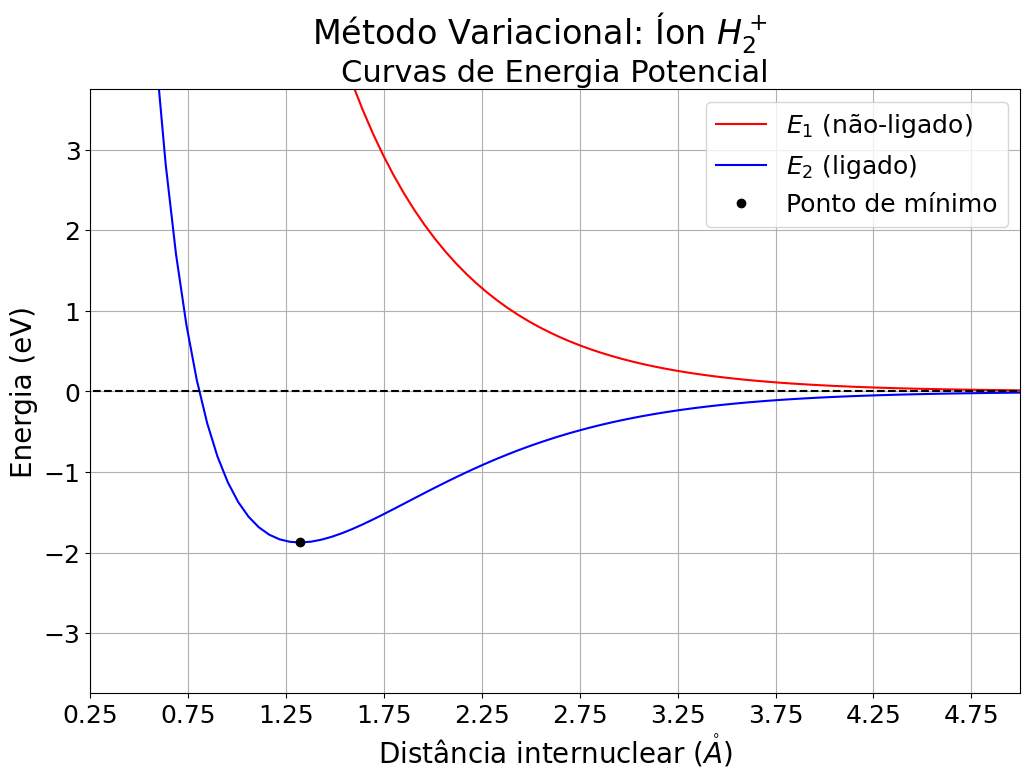

In [22]:
#Cria o fundo, o título e o subtítulo
plt.figure(figsize = (12, 8), dpi = 100)
plt.suptitle('Método Variacional: Íon $H_2^+$', fontsize=24)
plt.title('Curvas de Energia Potencial', fontsize=22)
plt.grid()

#Realiza o plot
plt.plot(angs(vec_R), eV(cepE1), 'r-', label = '$E_1$ (não-ligado)')
plt.plot(angs(vec_R), eV(cepE2), 'b-', label = '$E_2$ (ligado)')
plt.plot(angs(vec_R), np.zeros(len(vec_R)), 'k--')

#Insere o ponto de mínimo na figura
plt.plot(angs(Re)   , eV(De), 'ko', label = 'Ponto de mínimo') 

#Ajuste dos eixos
plt.ylim(2*eV(De),2*eV(-De))
plt.xlim(0.25, 5.)
plt.xticks(np.arange(0.25,5.1, 0.5), fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Distância internuclear ($\\mathring{A}$)', fontsize=20)
plt.ylabel('Energia (eV)', fontsize=20)

plt.legend(fontsize=18)
plt.show()

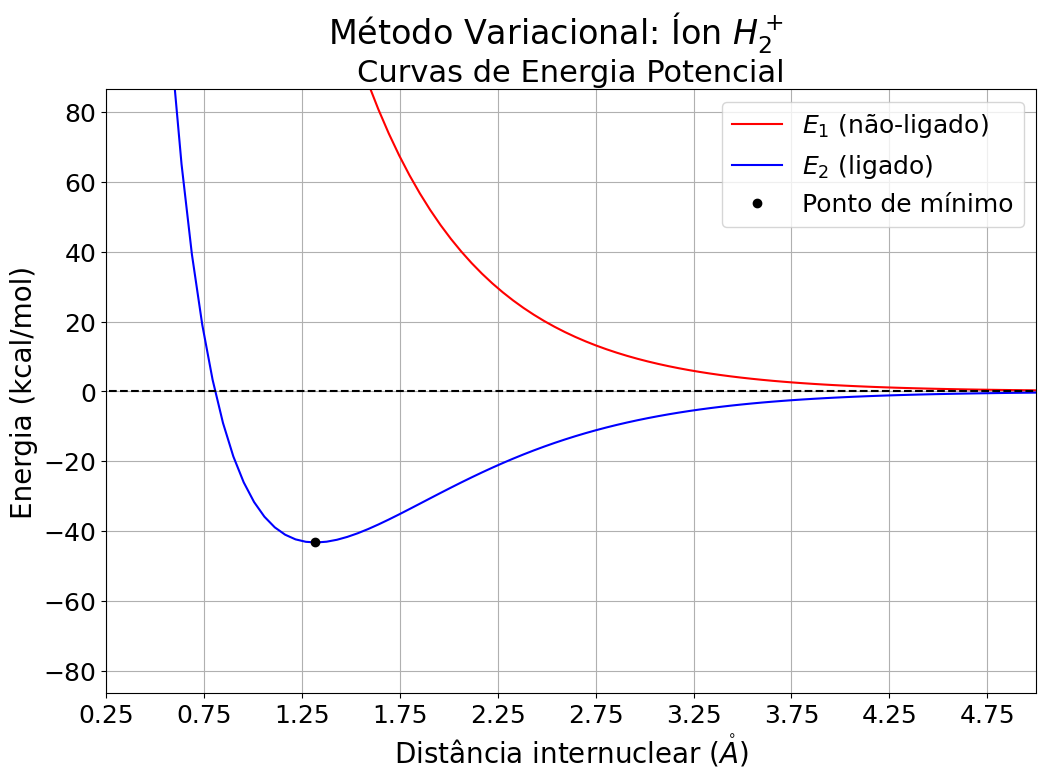

In [23]:
#Cria o fundo, o título e o subtítulo
plt.figure(figsize = (12, 8), dpi = 100)
plt.suptitle('Método Variacional: Íon $H_2^+$', fontsize=24)
plt.title('Curvas de Energia Potencial', fontsize=22)

#Realiza o plot
plt.plot(angs(vec_R), kcalMol(cepE1), 'r-', label = '$E_1$ (não-ligado)')
plt.plot(angs(vec_R), kcalMol(cepE2), 'b-', label = '$E_2$ (ligado)')
plt.plot(angs(vec_R), np.zeros(len(vec_R)), 'k--')

# Insere o ponto de mínimo na figura
plt.plot(angs(Re)   , kcalMol(De), 'ko', label = 'Ponto de mínimo') 

#Ajuste dos eixos
plt.ylim(2*kcalMol(De),2*kcalMol(-De))
plt.xlim(0.25, 5.)
plt.xticks(np.arange(0.25,5.1, 0.5), fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Distância internuclear ($\\mathring{A}$)', fontsize=20)
plt.ylabel('Energia (kcal/mol)', fontsize=20)
plt.grid()
plt.legend(fontsize=18)
plt.show()

## Questão 8

Os resultados teóricos obtidos nas questões 6 e 7 foram de:

 - $R_e = 1,319 \,\mathring{\mathrm{A}} = 2,492 \,\mathrm{Bohr}$;
 - $D_e = -1,874 \,\mathrm{eV} = -43,215 \,\mathrm{kcal/mol}$.

Por outro lado, os dados experimentais fornecidos no enunciado são:
 
 - $R_e = 1,06 \,\mathring{\mathrm{A}} = 2,0 \,\mathrm{Bohr}$;
 - $D_e = -2,641 \,\mathrm{eV} = -60,921 \,\mathrm{kcal/mol}$.
 
Percebe-se uma enorme discrepância entre estes e os valores obtidos por meio do método variacional. O valor de $D_e$ é bem maior que o experimental, respeitando assim o princípio variacional: $\mathcal{E}_0 \geq E_0$. 

Além disso, $R_e$ teórico é cerca de 25% maior que o experimental, o que faz sentido do ponto de vista variacional dado que, como estamos sobreestiando a energia de dissociação, também estaremos subestimando a estabilidade da molécula. Dessa forma, de acordo com o modelo teórico proposto, estamos supondo que a molécula é mais energética e, com isso, que a distância internuclear de estailidade seja maior.

## Questão 9

Como visto anteriormente, as autofunções de onda eletrônica correspondentes às energias $E_1$ e $E_2$ são, respectivamente, 

$$
\Phi_1(r_1, r_2) = \dfrac{\psi_1(r_1, r_2) - \psi_2(r_1, r_2)}{\sqrt{2(1-S_{12})}}\\
\Phi_2(r_1, r_2) = \dfrac{\psi_1(r_1, r_2) + \psi_2(r_1, r_2)}{\sqrt{2(1+S_{12})}}
$$

Para realizar o gráfico da função de onda, faremos uso da biblioteca `sympy` mais uma vez:

In [24]:
xi = sym.Symbol('xi')
eta = sym.Symbol('eta')

In [25]:
Phi1_expr = (sym.exp(-1*R*(xi+eta)/2) - sym.exp(-1*R*(xi-eta)/2))/(sym.sqrt(2*sym.pi*(1-s12)))
Phi1_expr.simplify()

sqrt(6)*(1 - exp(R*eta))*exp(-R*(eta + xi)/2)/(2*sqrt(pi)*sqrt((-R**2 - 3*R + 3*exp(R) - 3)*exp(-R)))

In [26]:
Phi2_expr = (sym.exp(-1*R*(xi+eta)/2) + sym.exp(-1*R*(xi-eta)/2))/(sym.sqrt(2*sym.pi*(1+s12)))
Phi2_expr.simplify()

sqrt(6)*(exp(R*eta) + 1)*exp(-R*(eta + xi)/2)/(2*sqrt(pi)*sqrt((R**2 + 3*R + 3*exp(R) + 3)*exp(-R)))

Assim como foi feito na Questão 5, podemos graficar o resultado utilizando dois `np.arrays` com os pontos a serem calculados em um dado intervalo:

In [27]:
vec_xi = np.arange(1., 10., 0.01)
vec_eta = np.arange(-1., 1., 0.01)
Xi, Eta = np.meshgrid(vec_xi,vec_eta)

E, por meio do `lambdify()`, podermos avaliar a expressão neste array:

In [28]:
rho1 = sym.lambdify([xi, eta, R], sym.Abs(Phi1_expr)**2, 'numpy')
rho2 = sym.lambdify([xi, eta, R], sym.Abs(Phi2_expr)**2, 'numpy')

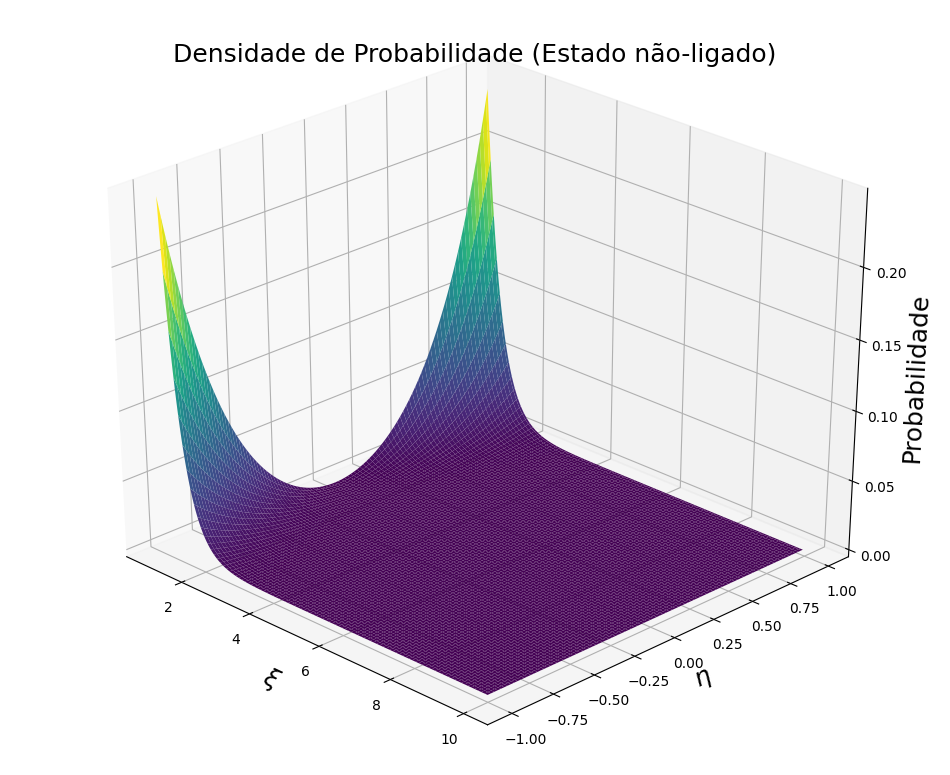

In [29]:
fig = plt.figure(figsize = (12, 10), dpi = 100)
ax1 = fig.add_subplot(projection = '3d')
ax1.view_init(30, -45)
ax1.set_title('Densidade de Probabilidade (Estado não-ligado)', fontsize = 18)
ax1.plot_surface(Xi,Eta,rho1(Xi, Eta, Re), cmap='viridis', rcount = 100,ccount = 100)
ax1.set_xlabel('$\\xi$', fontsize = 18)
ax1.set_ylabel('$\\eta$', fontsize = 18)
ax1.set_zlabel('Probabilidade', fontsize = 18)
plt.show()

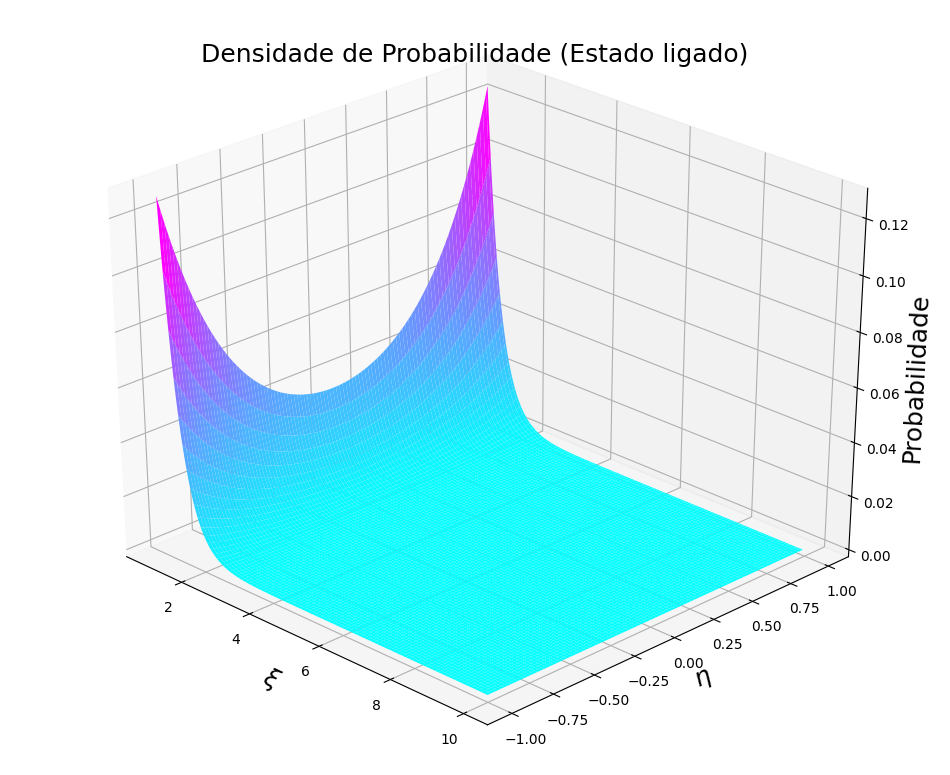

In [30]:
fig = plt.figure(figsize = (12, 10), dpi = 100)
ax2 = fig.add_subplot(projection = '3d')
ax2.view_init(30, -45)
ax2.set_title('Densidade de Probabilidade (Estado ligado)', fontsize = 18)
ax2.plot_surface(Xi,Eta,rho2(Xi, Eta, Re), cmap='cool', rcount = 100,ccount = 100)
ax2.set_xlabel('$\\xi$', fontsize = 18)
ax2.set_ylabel('$\\eta$', fontsize = 18)
ax2.set_zlabel('Probabilidade', fontsize = 18)
plt.show()

## Questão 10

Agora, vamos considerar que o eixo internuclear coincida com o eixo x e que a origem coincida com o ponto médio entre os dois núcleos. Neste caso, 

$$
r_1 = \left|x - \dfrac{R}{2}\right|\\
r_2 = \left|x + \dfrac{R}{2}\right|
$$

Substituindo estes valores nas expressões de $\psi_1$ e $\psi_2$, temos:

$$
\Phi_1(x, R) = \dfrac{e^{-\left|x - \frac{R}{2}\right|}-e^{-\left|x + \frac{R}{2}\right|}}
                     {\sqrt{2\pi(1-S_{12})}}\\
\Phi_2(x, R) = \dfrac{e^{-\left|x - \frac{R}{2}\right|}+e^{-\left|x + \frac{R}{2}\right|}}
                     {\sqrt{2\pi(1+S_{12})}}\\
$$

Mais uma vez, insere-se as expressões para $\Phi_1$ e $\Phi_2$ no Python por meio da biblioteca `sympy`:

In [31]:
x = sym.Symbol('x') # Declara o símbolo x

In [32]:
Phi1_expr = (sym.exp(-sym.Abs(x-R/2)) - sym.exp(-sym.Abs(x+R/2)))/(sym.sqrt(2*sym.pi*(1-s12)))
Phi1_expr.simplify()

-sqrt(6)*(exp(-Abs(R + 2*x)/2) - exp(-Abs(R - 2*x)/2))/(2*sqrt(pi)*sqrt(-R**2*exp(-R) - 3*R*exp(-R) + 3 - 3*exp(-R)))

In [33]:
Phi2_expr = (sym.exp(-sym.Abs(x-R/2)) + sym.exp(-sym.Abs(x+R/2)))/(sym.sqrt(2*sym.pi*(1+s12)))
Phi2_expr.simplify()

sqrt(6)*(exp(-Abs(R + 2*x)/2) + exp(-Abs(R - 2*x)/2))/(2*sqrt(pi)*sqrt(R**2*exp(-R) + 3*R*exp(-R) + 3 + 3*exp(-R)))

Novamente, utiliza-se um `np.array` com os pontos a serem calculados:

In [34]:
vec_x = np.arange(-5., 5., 0.01)

E, por meio do `lambdify()`, podermos avaliar as expressões neste array:

In [35]:
Phi1 = sym.lambdify([x, R], Phi1_expr, 'numpy')
Phi2 = sym.lambdify([x, R], Phi2_expr, 'numpy')

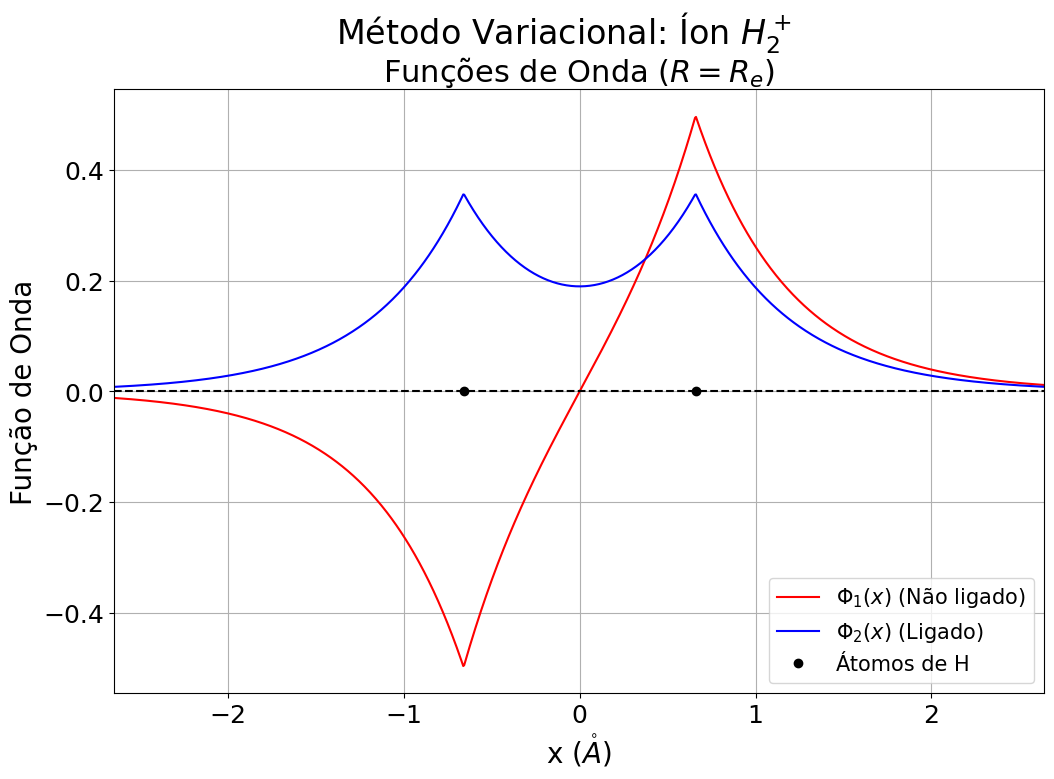

In [36]:
plt.figure(figsize = (12, 8), dpi = 100)
plt.suptitle('Método Variacional: Íon $H_2^+$', fontsize=24)
plt.title('Funções de Onda ($R = R_e$)', fontsize=22)
plt.grid()

plt.plot(angs(vec_x), Phi1(vec_x, Re), 'r-', label='$\\Phi_1(x)$ (Não ligado)')
plt.plot(angs(vec_x), Phi2(vec_x, Re), 'b-', label='$\\Phi_2(x)$ (Ligado)')
plt.plot(angs(vec_x), np.zeros(len(vec_x)), 'k--')
plt.plot([angs(-Re/2), angs(Re/2)], [0., 0.], 'ko', label='Átomos de H')

plt.xlim(angs(vec_x[0]), angs(vec_x[len(vec_x)-1]))
plt.xlabel('x ($\\mathring{A}$)', fontsize=20)
plt.ylabel('Função de Onda', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.legend(loc = 4,fontsize=15)
plt.show()

## Questão 11

Podemos, ainda, calcular as densidades de probabilidade $\rho_1(x,R) = |\Phi_1(x,R)|^2$ e $\rho_2(x,R) = |\Phi_2(x,R)|^2$: 

In [37]:
rho1_expr = (Phi1_expr)**2
rho1_expr.simplify()

-3*(exp(Abs(R - 2*x)/2) - exp(Abs(R + 2*x)/2))**2*exp(R - Abs(R - 2*x) - Abs(R + 2*x))/(2*pi*(R**2 + 3*R - 3*exp(R) + 3))

In [38]:
rho2_expr = (Phi2_expr)**2
rho2_expr.simplify()

3*(exp(Abs(R - 2*x)/2) + exp(Abs(R + 2*x)/2))**2*exp(R - Abs(R - 2*x) - Abs(R + 2*x))/(2*pi*(R**2 + 3*R + 3*exp(R) + 3))

In [39]:
rho1 = sym.lambdify([x, R], rho1_expr, 'numpy')
rho2 = sym.lambdify([x, R], rho2_expr, 'numpy')

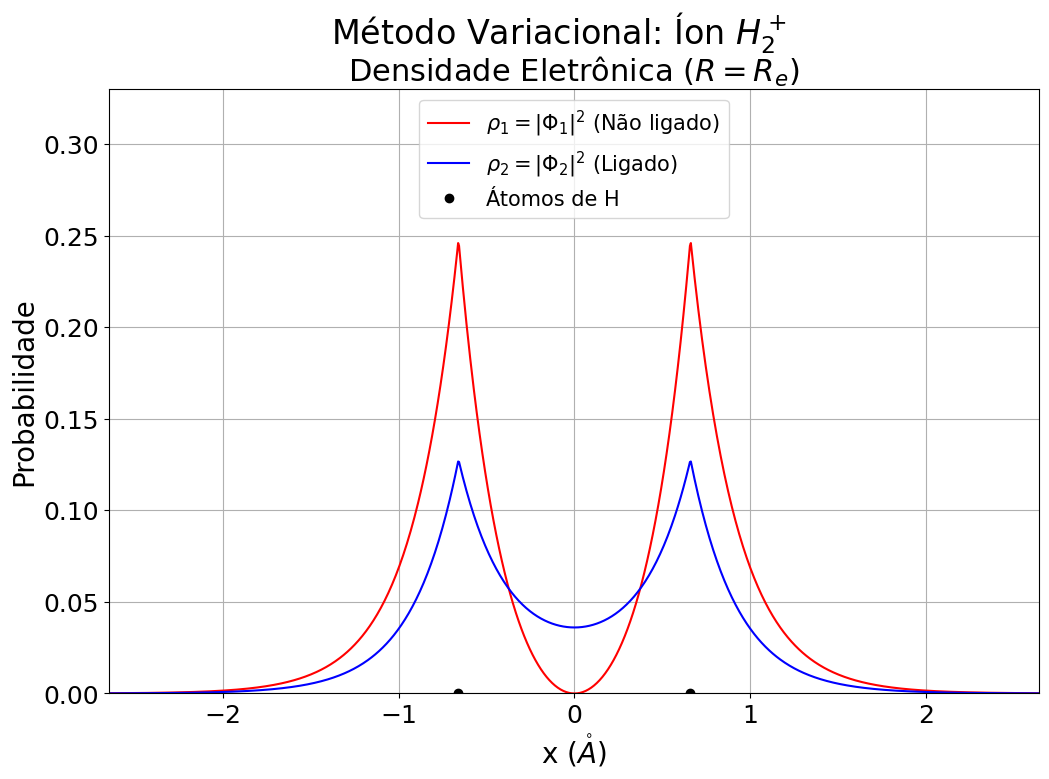

In [40]:
plt.figure(figsize = (12, 8), dpi = 100)
plt.suptitle('Método Variacional: Íon $H_2^+$', fontsize=24)
plt.title('Densidade Eletrônica ($R = R_e$)', fontsize=22)
plt.grid()

plt.plot(angs(vec_x), rho1(vec_x, Re), 'r-', label='$\\rho_1 = |\\Phi_1|^2$ (Não ligado)')
plt.plot(angs(vec_x), rho2(vec_x, Re), 'b-', label='$\\rho_2 = |\\Phi_2|^2$ (Ligado)')
plt.plot([angs(-Re/2), angs(Re/2)], [0., 0.], 'ko', label='Átomos de H')

plt.xlim(angs(vec_x[0]), angs(vec_x[len(vec_x)-1]))
plt.ylim(0,0.33)
plt.xlabel('x ($\\mathring{A}$)', fontsize=20)
plt.ylabel('Probabilidade', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.legend(loc = 9,fontsize=15)
plt.show()

## Questão 12

O termo molecular do autoestado $\Phi_1$ será dado sabendo que, neste autoestado:
- O spin total é $S = 1/2 \implies M = 2S+1 = 2$ (Dupleto);
- O momento angular orbital é $\Lambda = 0 \implies \Sigma$;
- O momento angular total é $\Omega = 1/2 + 0 = 1/2$;
- A paridade da função é ímpar e ela possui simetria de reflexão.

Logo, o símbolo do termo molecular correspondente ao autoestado $\Phi_1$ é $$\boxed{X^2\Sigma^+_u} $$

Já termo molecular do autoestado $\Phi_2$ será dado sabendo que, neste autoestado:
- O spin total é $S = 1/2 \implies M = 2S+1 = 2$ (Dupleto);
- O momento angular orbital é $\Lambda = 0 \implies \Sigma$;
- O momento angular total é $\Omega = 1/2 + 0 = 1/2$;
- A paridade da função é par e ela possui simetria de reflexão.

Logo, o símbolo do termo molecular correspondente ao autoestado $\Phi_2$ é $$\boxed{X^2\Sigma^+_g}$$